In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import (accuracy_score, confusion_matrix, recall_score, classification_report, precision_score, f1_score, roc_curve, auc)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder 

In [2]:
cancer = load_breast_cancer()
x = pd.DataFrame(cancer.data ,columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target")
target_names = cancer.target_names

In [4]:
print("Breast cancer dataset: ")
print(f"Dataset shape: {x.shape}")
print(f"Target classes: {target_names} (0: malignant, 1: benign)")
print("\nFirst 5 rows of features: ")
print(x.head())
print("\nTarget distrubutions: ")
print(y.value_counts())
print(f"Malignant: {(y==0).sum()}, Benign: {(y==1).sum()}")

Breast cancer dataset: 
Dataset shape: (569, 30)
Target classes: ['malignant' 'benign'] (0: malignant, 1: benign)

First 5 rows of features: 
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280       

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")
print(f"Malignant in training: {(y_train==0).sum()}, Benign: {(y_train==1).sum()}")
print(f"Malignant in test: {(y_test==0).sum()}, Benign: {(y_test==1).sum()}")



Training set size: 398
Test set size: 171
Malignant in training: 148, Benign: 250
Malignant in test: 64, Benign: 107


In [6]:
dt_classfier = DecisionTreeClassifier(
    random_state=42, 
    max_depth=4, 
    min_samples_split=5,
    min_samples_leaf=2
)

dt_classfier.fit(x_train, y_train)

y_pred  = dt_classfier.predict(x_test)
y_pred_prob = dt_classfier.predict_proba(x_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision tree perf metrics: ")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Decision tree perf metrics: 
Accuracy: 0.9240
Precision: 0.9352
Recall : 0.9439
F1 Score: 0.9395


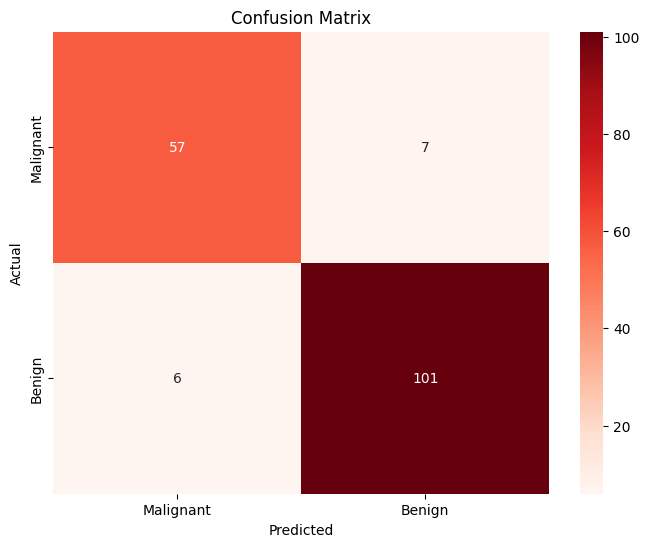

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [10]:
print("\nClassification Report: ")
print(classification_report(y_test,y_pred, target_names=['Malignant', 'Benign']))




Classification Report: 
              precision    recall  f1-score   support

   Malignant       0.90      0.89      0.90        64
      Benign       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

